# Testing the new genetic method code

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import create_model
from itertools import product
from ANN_manager import read_ANN
from genetic_method import randomize_params
from observational_data import get_obs_data, obs_data_O3N2_plot
from plots_functions import bpt_diagram_scatter
from CALIFA_data import get_data, clean_data_incl

## Creating the data pool

### Creating parents

We create the parents data pool

In [2]:
ref_params = {'a1': -1.37, 'a3': -1.37, 'x0_2': 8,
              'b1': 8.42, 'c': -1.6, 'a2': 1, 'x0': 8}
new_params = randomize_params(ref_params)
print(new_params)

{'a1': -1.5197044259714383, 'a3': -1.6204105616595883, 'x0_2': 8.305695976015222, 'b1': 7.937779033460972, 'c': -1.366822347673815, 'a2': 0.5738249160821493, 'x0': 8.301625176871946}


In [3]:
ANN = read_ANN('ANN_BOND_ALL',
               os.path.expanduser('~/GoogleDrive/cespinosa/data/ANNs/'))

Reading ANN_BOND_ALL
Trained with 210600 models, tested with 0 models
Reading ANNs: Done


/home/espinosa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/espinosa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
n_init_models = 10
new_params_list = [randomize_params(ref_params) for _ in range(n_init_models)]
parents_list = [create_model(ANN, params, 'func', [6.6, 9.4])
                for params in new_params_list]
genes_pool = pd.concat(parents_list, ignore_index=True, axis=1).T

### Reading Obs data

#### Marino data

In [5]:
marino, chaos, califa = get_obs_data()

/home/espinosa/GoogleDrive/cespinosa/data/obs/Marino_CHAOS_data_clean_v2.csv


/home/espinosa/GoogleDrive/cespinosa/Code/ANN_for_ISM/CALIFA_data.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sfh_all = dataframe_sfh_extended.append(df_sfh_pilot, sort=False)
/home/espinosa/GoogleDrive/cespinosa/Code/ANN_for_ISM/CALIFA_data.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ssp_all = dataframe_ssp_e.append(dataframe_ssp_p, sort=False)


5634 212


/home/espinosa/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/espinosa/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/espinosa/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/espinosa/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/espinosa/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/espinosa/anaconda3/lib/python3.9/site-packages/pandas/core

#### CALIFA data

In [6]:
CALIFA_data = get_data()
data = clean_data_incl(CALIFA_data, 70)

/home/espinosa/GoogleDrive/cespinosa/Code/ANN_for_ISM/CALIFA_data.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sfh_all = dataframe_sfh_extended.append(df_sfh_pilot, sort=False)
/home/espinosa/GoogleDrive/cespinosa/Code/ANN_for_ISM/CALIFA_data.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ssp_all = dataframe_ssp_e.append(dataframe_ssp_p, sort=False)


5634 212


In [7]:
OIII4363_snr = CALIFA_data.loc[:,'fluxOIII4363']/CALIFA_data.loc[:,'e_fluxOIII4363']
mask_OIII4363 = OIII4363_snr > 3
CALIFA_data_clean = CALIFA_data[mask_OIII4363]

In [8]:
OIII3727_snr = CALIFA_data_clean.loc[:,'fluxOII3727']/CALIFA_data_clean.loc[:,'e_fluxOII3727']
mask_OIII3727 = OIII3727_snr > 3
sum(mask_OIII3727)

1101

/home/espinosa/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, '$\\log([\\mathrm{OIII}]\\lambda 5007/\\mathrm{H}\\beta)$')

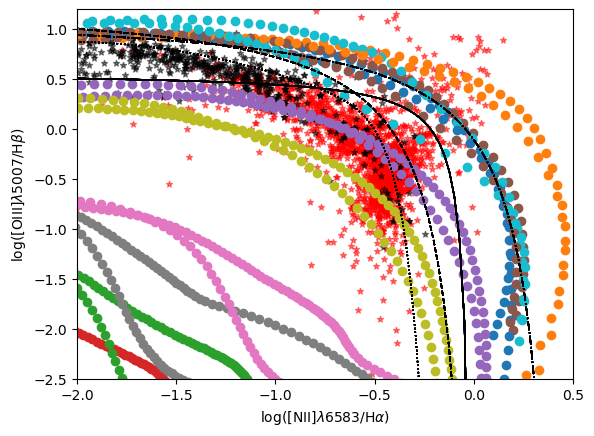

In [10]:
fig, ax = plt.subplots()
age = 1
ax.scatter(np.log10(CALIFA_data_clean['N2Ha_dd']),
           np.log10(CALIFA_data_clean['O3Hb_dd']), c='r', s=20, marker='*',
           alpha=0.5)
obs_data_O3N2_plot(marino, ax)
for fr in ['low', 'high']:
  for row1, row2 in zip(genes_pool.loc[:, f'N2_{fr}_{age}'].iteritems(),
                        genes_pool.loc[:, f'O3_{fr}_{age}'].iteritems()):
    x = row1[1]
    y = row2[1]
    bpt_diagram_scatter(x, y, ax=ax)
ax.set_xlabel(r'$\log([\mathrm{NII}]\lambda 6583/\mathrm{H}\alpha)$')
ax.set_ylabel(r'$\log([\mathrm{OIII}]\lambda 5007/\mathrm{H}\beta)$')

In [16]:
new_params

{'a1': -1.8669661515560683,
 'a3': -1.5677140595320234,
 'x0_2': 7.532237299819951,
 'b1': 8.045809001596087,
 'c': -1.9871858399868931,
 'a2': 1.4928176578582393,
 'x0': 8.232961676152563}